# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd 
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm


import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [2]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# 1: Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices("tip ~ sex + smoker + time + net_bill", tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.64e-20
Time:                        00:49:14   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# 2: Remova as variáveis não significantes.
y, X = patsy.dmatrices("tip ~ net_bill", tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        00:49:14   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 3: observe o gráfico de resíduos em função de net_bill
y, X = patsy.dmatrices("tip ~ size + net_bill", tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           8.15e-25
Time:                        00:49:14   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.000       0.436       1.260
size           0.3402      0.091      3.727      0.000       0.160       0.520
net_bill       0.0760      0.011      7.032      0.000       0.055       0.097
==============================================================================
Omnibus:                       43.472   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.448
Skew:                           0.887   Prob(JB):                     6.22e-20
Kurtosis:                       5.356   Cond. No.                         57.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           3.17e-23
Time:                        00:49:14   Log-Likelihood:                -283.71
No. Observations:                 244   AIC:                             571.4
Df Residuals:                     242   BIC:                             578.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4191      0.115     12.290      0.0

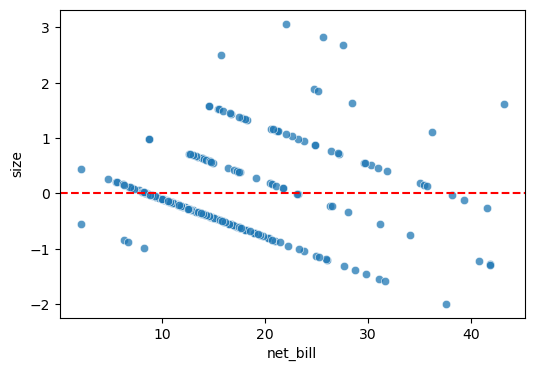

In [6]:
reg = smf.ols("size ~ net_bill", data = tips).fit()
print(reg.summary())
tips["size"] = reg.resid

sns.scatterplot(x = "net_bill", y = "size", data = tips, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.902
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.151
Time:                        00:49:14   Log-Likelihood:                -281.80
No. Observations:                 244   AIC:                             569.6
Df Residuals:                     241   BIC:                             580.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.41

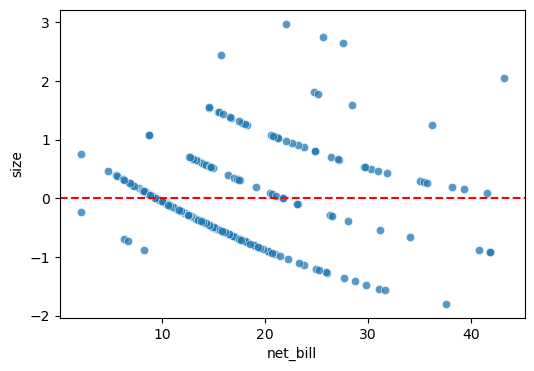

In [7]:
# 4: teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#POLINOMIO:
reg = smf.ols("size ~ net_bill + np.power(net_bill,2)", data = tips).fit()
print(reg.summary())
tips["size"] = reg.resid

sns.scatterplot(x = "net_bill", y = "size", data = tips, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.03431
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.853
Time:                        00:49:15   Log-Likelihood:                -281.78
No. Observations:                 244   AIC:                             567.6
Df Residuals:                     242   BIC:                             574.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0519      0.285  

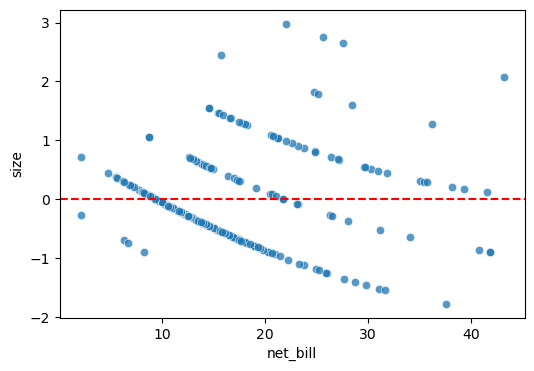

In [8]:
# 4: teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#LOG:
reg = smf.ols("size ~ np.log(net_bill)", data = tips).fit()
print(reg.summary())
tips["size"] = reg.resid

sns.scatterplot(x = "net_bill", y = "size", data = tips, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

In [9]:
print("Ao meu ver o melhor modelo é o modelo Polinômio porque apresenta o R-SQUARED mais alto.")

Ao meu ver o melhor modelo é o modelo Polinômio porque apresenta o R-SQUARED mais alto.


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [11]:
# 1:Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices("tip ~ sex + smoker + time + net_bill", tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.64e-20
Time:                        00:49:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 2:Remova as variáveis não significantes.
y, X = patsy.dmatrices("tip ~ net_bill", tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        00:49:15   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           3.17e-23
Time:                        00:49:15   Log-Likelihood:                -283.71
No. Observations:                 244   AIC:                             571.4
Df Residuals:                     242   BIC:                             578.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4191      0.115     12.290      0.0

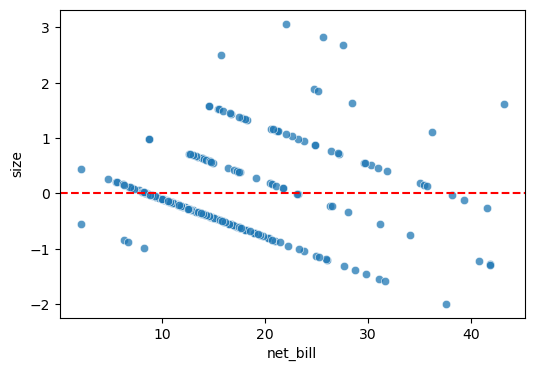

In [13]:
# 3: Observe o gráfico de resíduos em função de net_bill
reg = smf.ols("size ~ net_bill", data = tips).fit()
print(reg.summary())
tips["size"] = reg.resid

sns.scatterplot(x = "net_bill", y = "size", data = tips, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.902
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.151
Time:                        00:49:16   Log-Likelihood:                -281.80
No. Observations:                 244   AIC:                             569.6
Df Residuals:                     241   BIC:                             580.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.41

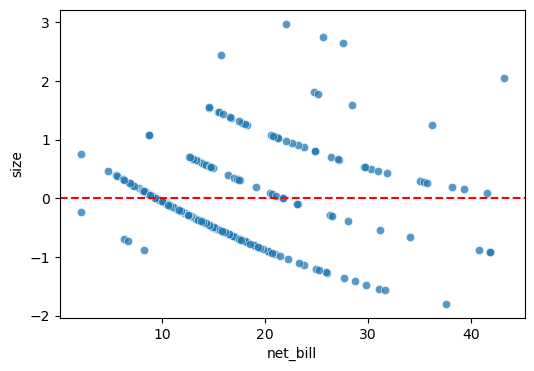

In [14]:
# 4: Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#POLINOMIO:
reg = smf.ols("size ~ net_bill + np.power(net_bill,2)", data = tips).fit()
print(reg.summary())
tips["size"] = reg.resid

sns.scatterplot(x = "net_bill", y = "size", data = tips, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

In [15]:
# 5:Do modelo final deste item, calcule o  𝑅2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?
print("Sabemos que o R_quadrado é o mesmo valor do R-SQUARED, portanto o primeiro modelo é melhor porque o r-squared vale 0.335, tendo um valor maior portanto um melhor coeficiente de determinação, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. ")

Sabemos que o R_quadrado é o mesmo valor do R-SQUARED, portanto o primeiro modelo é melhor porque o r-squared vale 0.335, tendo um valor maior portanto um melhor coeficiente de determinação, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. 


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [16]:
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [17]:
# 1: Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
reg = smf.ols("renda ~ tempo_emprego", data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:49:16   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:49:16   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

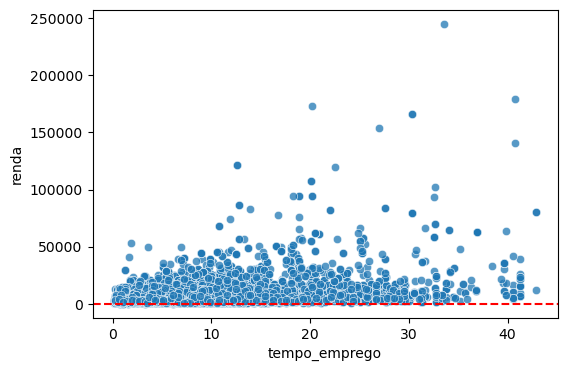

In [18]:
# 2: Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
#VARIÁVEL CRUA.
reg = smf.ols("renda ~ tempo_emprego", data = df).fit()
print(reg.summary())
df["res"] = reg.resid

sns.scatterplot(x = "tempo_emprego", y = "renda", data = df, alpha = 0.75)
plt.axhline(y=0, color = "r", linestyle = "--")

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:49:17   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

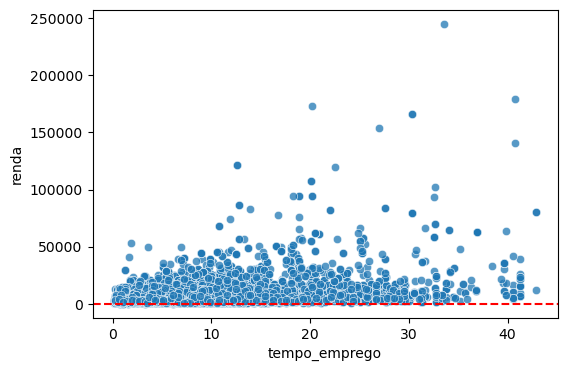

In [19]:
#POLINÔMIO DE 2ª GRAU

reg = smf.ols("renda ~ tempo_emprego + np.power(tempo_emprego,2)", data = df).fit()
print(reg.summary())
df["res"] = reg.resid

sns.scatterplot(x = "tempo_emprego", y = "renda", data = df, alpha = 0.75)
plt.axhline(y=0, color = "r", linestyle = "--")

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.451
Model:                            OLS   Adj. R-squared:                 -0.451
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                nan
Time:                        00:49:17   Log-Likelihood:            -1.3294e+05
No. Observations:               12427   AIC:                         2.659e+05
Df Residuals:                   12426   BIC:                         2.659e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.682e-

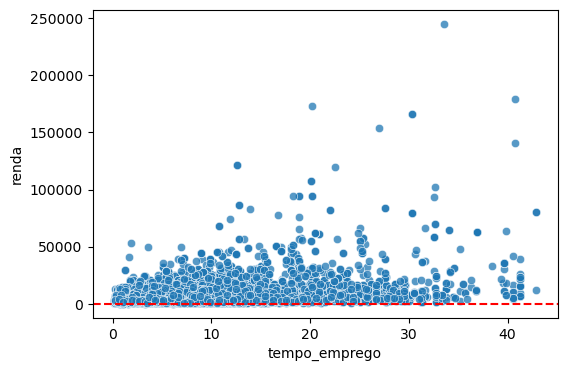

In [20]:
#FUNÇÃO EXPONENCIAL

reg = smf.ols("renda ~ np.exp(tempo_emprego)", data = df).fit()
print(reg.summary())
df["res"] = reg.resid

sns.scatterplot(x = "tempo_emprego", y = "renda", data = df, alpha = 0.75)
plt.axhline(y=0, color = "r", linestyle = "--")

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1289.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          1.29e-268
Time:                        00:49:18   Log-Likelihood:            -1.3001e+05
No. Observations:               12427   AIC:                         2.600e+05
Df Residuals:                   12425   BIC:                         2.600e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

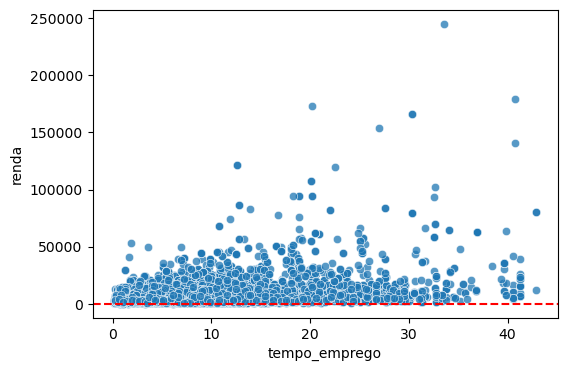

In [21]:
#FUNÇÃO LOGARITMICA

reg = smf.ols("renda ~ np.log(tempo_emprego+.1)", data = df).fit()
print(reg.summary())
df["res"] = reg.resid

sns.scatterplot(x = "tempo_emprego", y = "renda", data = df, alpha = 0.75)
plt.axhline(y=0, color = "r", linestyle = "--")

In [22]:
# 2: Como você melhoraria essa regressão:
print("Eu melhoraria essa regreção utilizando o polinômio de segundo grau por apresentar o maior valor de R-SQUARED e com isso ele melhor se ajusta à amostra.")

Eu melhoraria essa regreção utilizando o polinômio de segundo grau por apresentar o maior valor de R-SQUARED e com isso ele melhor se ajusta à amostra.


In [23]:
# 3: Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [24]:
reg = smf.ols("renda ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + renda ", data = df).fit() 
df["res_log"] = reg.resid  
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.317e+29
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:49:19   Log-Likelihood:             2.5773e+05
No. Observations:               12427   AIC:                        -5.154e+05
Df Residuals:                   12386   BIC:                        -5.151e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.972e-10   7.83e-11     -2.519      0.012   -3.51e-10   -4.37e-11
data_ref[T.2015-02-01]            3.091e-10   1.17e-11     26.386      0.000    2.86e-10    3.32e-10
data_ref[T.2015-03-01]            4.483e-10   1.17e-11     38.165      0.000    4.25e-10    4.71e-10
data_ref[T.2015-04-01]           -4.543e-11   1.17e-11     -3.879      0.000   -6.84e-11   -2.25e-11
data_ref[T.2015-05-01]           -3.717e-10   1.17e-11    -31.822      0.000   -3.95e-10   -3.49e-10
data_ref[T.2015-06-01]            5.001e-11   1.17e-11      4.263      0.000     2.7e-11     7.3e-11
data_ref[T.2015-07-01]           -3.175e-11   1.17e-11     -2.716      0.007   -5.47e-11   -8.84e-12
data_ref[T.2015-08-01]            3.811e-10   1.17e-11     32.496      0.000    3.58e-10    4.04e-10
data_ref[T.2015-09-01]            2.496e-10   1.17e-11     21.424      0.000    2.27e-10    2.72e-10
data_ref[T.2015-10-01]            1.478e-10   1.17e-11     12.602      0.000    1.25e-10    1.71e-10
data_ref[T.2015-11-01]            3.043e-10   1.17e-11     25.930      0.000    2.81e-10    3.27e-10
data_ref[T.2015-12-01]            2.439e-10   1.18e-11     20.710      0.000    2.21e-10    2.67e-10
data_ref[T.2016-01-01]            4.196e-10   1.17e-11     35.776      0.000    3.97e-10    4.43e-10
data_ref[T.2016-02-01]             2.95e-10   1.17e-11     25.164      0.000    2.72e-10    3.18e-10
data_ref[T.2016-03-01]            6.015e-10   1.18e-11     50.851      0.000    5.78e-10    6.25e-10
sexo[T.M]                        -7.105e-14   5.13e-12     -0.014      0.989   -1.01e-11    9.99e-12
posse_de_veiculo[T.True]          4.661e-12   4.68e-12      0.996      0.319   -4.51e-12    1.38e-11
posse_de_imovel[T.True]          -1.535e-12   4.64e-12     -0.330      0.741   -1.06e-11    7.57e-12
tipo_renda[T.Bolsista]            1.583e-11   7.98e-11      0.198      0.843   -1.41e-10    1.72e-10
tipo_renda[T.Empresário]         -7.987e-12   4.94e-12     -1.616      0.106   -1.77e-11     1.7e-12
tipo_renda[T.Pensionista]        -2.876e-11   7.98e-11     -0.360      0.719   -1.85e-10    1.28e-10
tipo_renda[T.Servidor público]    2.316e-12   7.35e-12      0.315      0.753   -1.21e-11    1.67e-11
educacao[T.Pós graduação]         7.276e-12   5.26e-11      0.138      0.890   -9.58e-11     1.1e-10
educacao[T.Secundário]            8.527e-12   2.38e-11      0.358      0.720   -3.81e-11    5.52e-11
educacao[T.Superior completo]     1.205e-11   2.39e-11      0.504      0.614   -3.48e-11    5.89e-11
educacao[T.Superior incompleto]   1.819e-11   2.57e-11      0.707      0.480   -3.22e-11    6.86e-11
estado_civil[T.Separado]         -5.357e-12   3.68e-11     -0.146      0.884   -7.75e-11    6.67e-11
estado_civil[T.Solteiro]          1.205e-11    3.6e-1

In [28]:
# 4: Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
reg = smf.ols("renda ~ sexo + posse_de_imovel + idade + tempo_emprego", data = df).fit() 

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:50:23   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2121.6370    329.140     -6.446      0.000   -2766.803   -1476.471
sexo[T.M]                6045.7894    145.591     41.526      0.000    5760.409    6331.169
posse_de_imovel[T.True]   394.7377    145.657      2.710      0.007     109.228     680.247
idade                      37.5533      7.838      4.791      0.000      22.189      52.918
tempo_emprego             550.4590     10.903     50.485      0.000     529.087     571.831
==============================================================================
Omnibus:                    17506.453   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9670624.952
Skew:                           8.073   Prob(JB):                         0.00
Kurtosis:                     138.705   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='idade', ylabel='renda'>

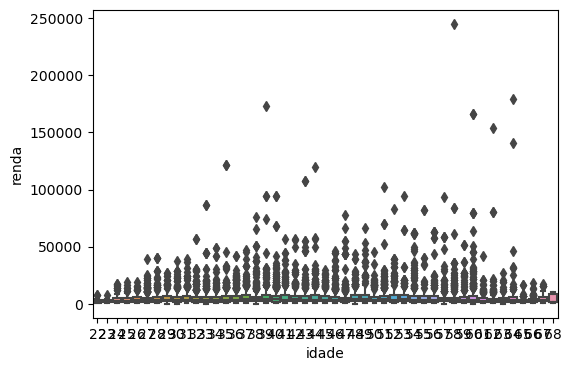

In [29]:
sns.boxplot(x = "idade", y = "renda", data = df)

<Axes: xlabel='sexo', ylabel='renda'>

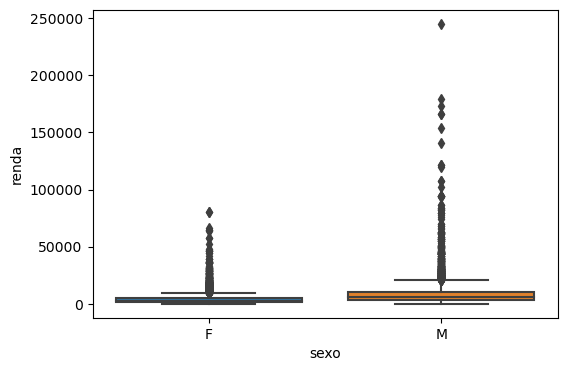

In [30]:
sns.boxplot(x = "sexo", y = "renda", data = df)

<Axes: xlabel='tempo_emprego', ylabel='renda'>

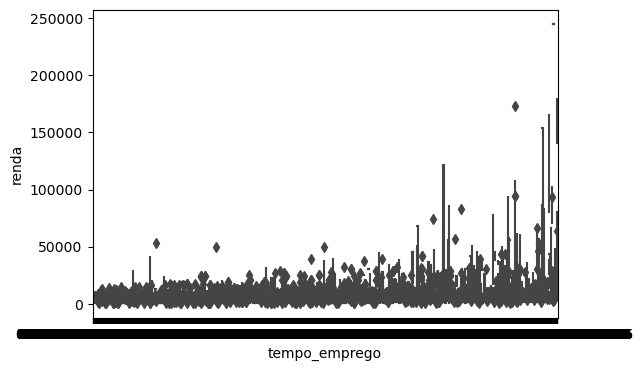

In [31]:
sns.boxplot(x = "tempo_emprego", y = "renda", data = df)

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

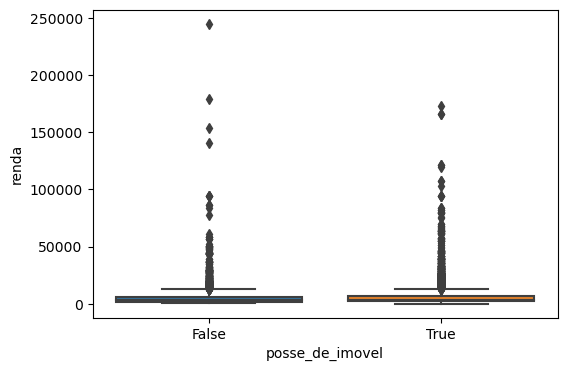

In [32]:
sns.boxplot(x = "posse_de_imovel", y = "renda", data = df)